OpenCV provides a very versatile `filter2D()` function, which applies any kernel or
convolution matrix that we specify.

In [2]:
%pip install scipy
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

img=mpimg.imread('flowers.jpg')
imgplot = plt.imshow(img)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------- -------------------------------- 7.9/41.0 MB 44.4 MB/s eta 0:00:01
   ---------------------- ----------------- 23.1/41.0 MB 59.6 MB/s eta 0:00:01
   ------------------------------------ --- 37.5/41.0 MB 61.9 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 52.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


FileNotFoundError: [Errno 2] No such file or directory: 'flowers.jpg'

After the initial import, we define a 3x3 kernel. Here, the pixel of interest has a weight of 9 and its immediate neighbors each
have a weight of -1. For the pixel of interest, the output color will be nine times
its input color minus the input colors of all eight adjacent pixels. If the pixel
of interest is already a bit different from its neighbors, this difference becomes
intensified. The effect is that the image looks sharper as the contrast between the
neighbors is increased.

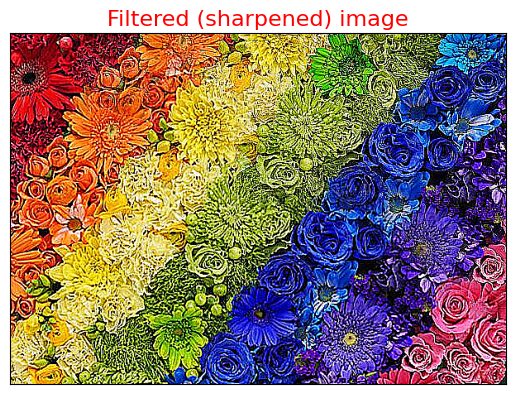

In [ ]:
kernel = np.array([[-1, -1, -1],
           [-1, 9, -1],
           [-1, -1, -1]])
dst=cv2.filter2D(img, -1, kernel)
#when ddepth=-1, the output image will have the same depth as the source.
imgplot = plt.imshow(dst)
plt.title('Filtered (sharpened) image',
          fontdict={'fontsize':16, 'color':'red'})
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()


For color images, note that `filter2D()` applies the kernel equally
to each channel. To use different kernels on different channels, we
would also have to use the `split()` and `merge()` functions.

Note that the weights in the previous kernel sum up to 1. This should be the case whenever we want to leave the image's overall brightness unchanged.

If we modify a sharpening kernel
slightly so that its weights sum up to 0 instead, we have an edge detection kernel
that turns edges white and non-edges black.

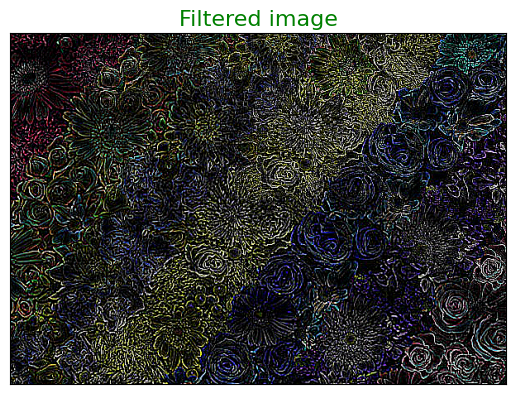

In [ ]:
kernel = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
dst=cv2.filter2D(img, -1, kernel)
imgplot = plt.imshow(dst)
plt.title('Filtered image',
          fontdict={'fontsize':16, 'color':'green'})
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

Next, let's make a blur filter. Generally, for a blur effect, the weights should sum up
to 1 and should be positive throughout the neighborhood. For example, we can take
a simple average of the neighborhood as follows:

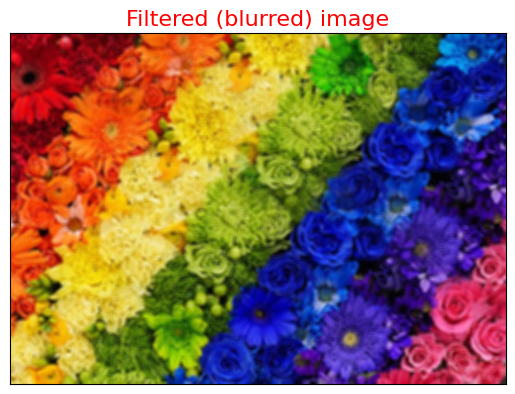

In [ ]:
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                      [0.04, 0.04, 0.04, 0.04, 0.04],
                      [0.04, 0.04, 0.04, 0.04, 0.04],
                      [0.04, 0.04, 0.04, 0.04, 0.04],
                      [0.04, 0.04, 0.04, 0.04, 0.04]])
dst=cv2.filter2D(img, -1, kernel)
imgplot = plt.imshow(dst)
plt.title('Filtered (blurred) image',
          fontdict={'fontsize':16, 'color':'red'})
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()

# High pass filters (Sharpening)
A high pass filter (HPF) is a filter that examines a region of an image and boosts
the intensity of certain pixels based on the difference in the intensity with the
surrounding pixels.
Let's go through an example of an HPF. We define a 3x3 kernel and a 5x5 kernel, and then we show the image in grayscale.

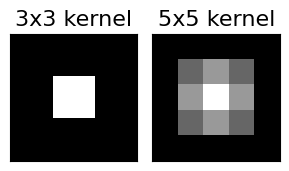

In [ ]:
#let's define a 3x3 kernel
kernel_3x3 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

#let's define a 5x5 kernel
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, 2, 4, 2, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, -1, -1, -1, -1]])

#we can show the kernels as (image) masks
fig, ax = plt.subplots(1,2, figsize=(3,3))
ax[0].imshow(kernel_3x3,'gray')
ax[0].set_title('3x3 kernel', fontsize=16)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(kernel_5x5,'gray')
ax[1].set_title('5x5 kernel', fontsize=16)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

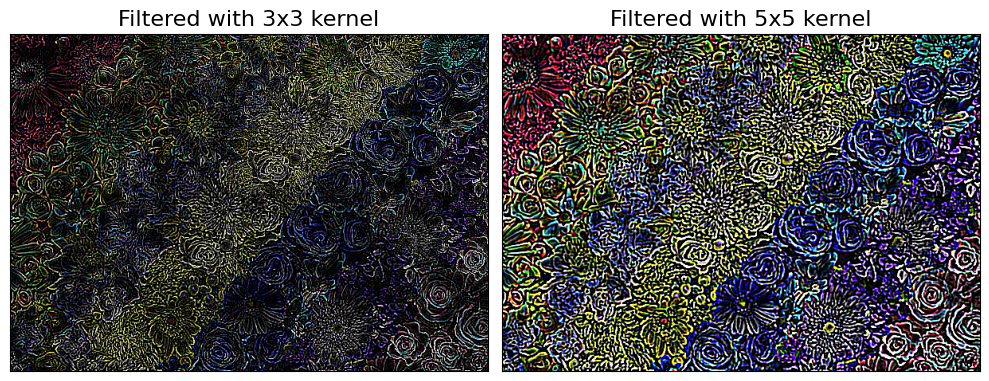

In [ ]:
#and convolve the image with the two kernels
k3 = cv2.filter2D(img, -1, kernel_3x3)
k5 = cv2.filter2D(img, -1, kernel_5x5)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(k3,'gray')
ax[0].set_title('Filtered with 3x3 kernel', fontsize=16)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(k5,'gray')
ax[1].set_title('Filtered with 5x5 kernel', fontsize=16)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

#Low pass filters (Blurring)
A
low pass filter (LPF) smoothes the pixel if the difference with the surrounding
pixels is lower than a certain threshold. This is used in denoising and blurring.

The goal of blurring is to perform noise reduction, especially in color images.
But we have to pay extra care here. If we apply edge detection algorithms to the images with high resolution, we’ll get too many detected outcomes that we aren’t interested in. On the contrary, if we blur the images too much, we'll lose the data. Therefore we need to find an adequate amount of blurring we're going to apply without losing desirable edges.

OpenCV provides many blurring filters, including `blur()` (simple average) `medianBlur()` and `GaussianBlur()`. Median blurring is the same with average blurring except that it uses the median value instead of the average. Therefore when we have to handle sudden noises in the image such as *salt and pepper noise*, it’ll be better to use median blurring than average blurring.
Gaussian blurring is nothing but using the kernel whose values have a Gaussian distribution. The values are generated by a Gaussian function so it requires a sigma value for its parameter. As you can see the image above, the values of the kernel go higher near the center and go smaller near the corner. It’s good to apply this method to the [noises that have a normal distribution](https://en.wikipedia.org/wiki/Gaussian_noise) such as [white noise](https://en.wikipedia.org/wiki/White_noise).

The arguments for blurring filters vary but always include the kernel size (`ksize`), an odd whole number that represents the width and height (in pixels) of the filter's kernel.

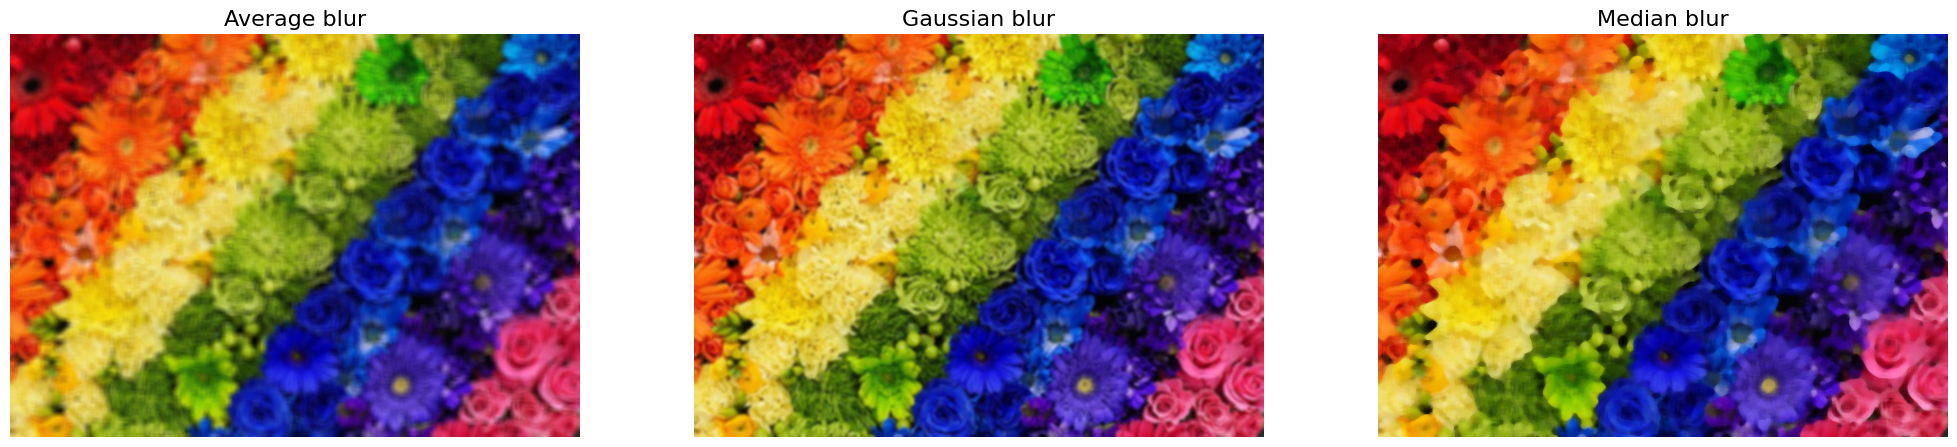

In [ ]:
# Blur the image with different blur filters
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)
img_2 = cv2.medianBlur(img, 7)

# Plot the images
images = [img_0, img_1, img_2]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 25))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
axs[0].set_title('Average blur', fontsize=16)
axs[1].set_title('Gaussian blur', fontsize=16)
axs[2].set_title('Median blur', fontsize=16)
plt.show()

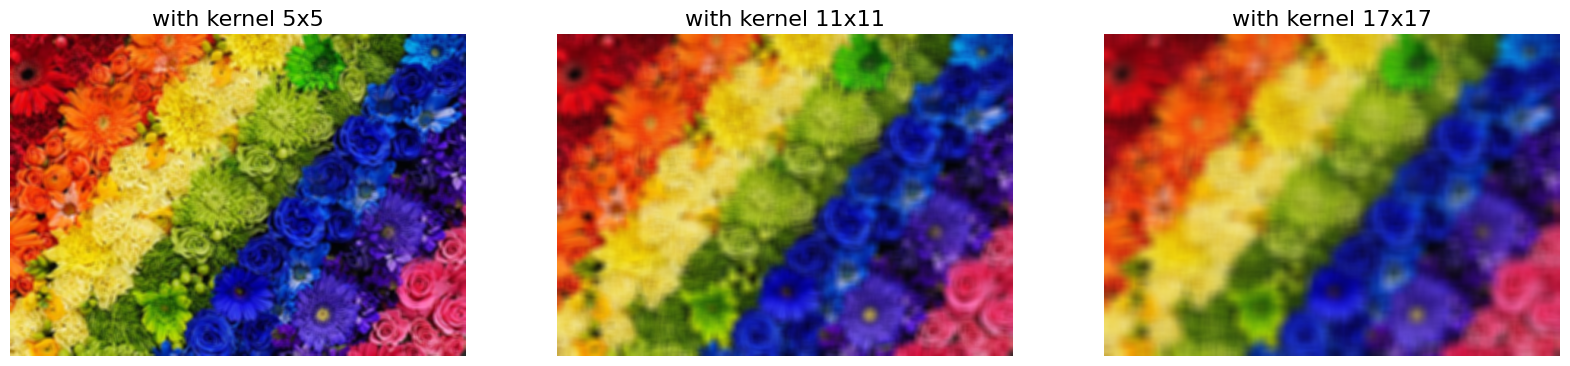

In [ ]:
# Let's see the effect of average blurring with different kernel sizes
kernel_size = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for index, s in enumerate(kernel_size):
    img_blurred = cv2.blur(img, ksize = (s, s))
    #img_blurred =cv2.medianBlur(img, s)
    #img_blurred = cv2.GaussianBlur(img,(s,s),cv2.BORDER_DEFAULT)
    ax = axs[index]
    ax.imshow(img_blurred)
    ax.axis('off')
axs[0].set_title('with kernel 5x5', fontsize=16)
axs[1].set_title('with kernel 11x11', fontsize=16)
axs[2].set_title('with kernel 17x17', fontsize=16)
plt.show()